# WHERE SHOULD I OPEN A RESTAURANT?

I AM PLANNING TO OPEN A RESTAURANT NEAR MY HOUSE(WITHIN A 10KM RADIUS). I AM LOOKING FOR THE RIGHT CUISINE AND THE RIGHT LOCATION SO THAT I CAN GAIN HUGE PROFITS, BUT HOW CAN I CHOOSE?

SO WE FIRST GET THE DATA OF THE RESTAURANTS IN BANGALORE. WE WILL EXAMINE THE DIFFERENT CUISINES IN EACH NEIGHBOR CLUSTER BASED ON THEIR RATING AND NUMBER OF RESTAURANTS. THEN WE WILL CHOOSE THE CLUSTER WHICH HAS THE LOWEST AVERAGE RESTAURANT RATING AND LEAST NUMBER OF RESTAURANTS SERVING THE HIGHEST RATED CUISINE AS OUR RESULTANT CLUSTER USING SOME WEIGHTED METHODS.

In [3]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import requests
from geopy.geocoders import Nominatim
import json
from pandas import json_normalize
from sklearn.cluster import KMeans

In [4]:
client_id = "P1BRDUNBKGVA44LZNLSJINAVHF52WT5IBWFUM5YNTYKJR2V1"
client_secret = "5QIX2Y4O2EHPH51USGIS0F32VLB0EGH4QZTYQKCVVPWOQS2J"

In [5]:
#house coordinates
address = "San Jose,CA"

locator = Nominatim(user_agent = "foursquare_api")
coordinates = locator.geocode(address)
latitude = coordinates.latitude
longitude = coordinates.longitude

In [6]:
latitude , longitude

(37.3361905, -121.8905833)

In [7]:
sj_map = folium.Map(location = [latitude,longitude],zoom_start = 12)

In [8]:
sj_map

In [9]:
#fetching the json file the restaurants in new york

In [10]:
#first let us make a list of the top cuisines in bangalore
cuisines = ['American','Italian','French','Indian',
            'Chinese','Japanese','Thai','Mexican',
           'Spanish']
cat_id = ['4bf58dd8d48988d14e941735','4bf58dd8d48988d110941735','4bf58dd8d48988d10c941735','4bf58dd8d48988d10f941735',
          '4bf58dd8d48988d145941735','4bf58dd8d48988d111941735','4bf58dd8d48988d149941735','4bf58dd8d48988d1c1941735',
         '4bf58dd8d48988d150941735']

In [11]:
df = pd.DataFrame({})
for index,code in enumerate(cat_id):
    url = "https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}".format(client_id, client_secret, latitude, longitude,20200404,code, 6000,100)
    results = requests.get(url).json()
    venues = results['response']['venues']
    data = json_normalize(venues)
    data["cuisine"] = cuisines[index]
    df = pd.concat([df,data],axis=0)
    print(index,cuisines[index])

0 American
1 Italian
2 French
3 Indian
4 Chinese
5 Japanese
6 Thai
7 Mexican
8 Spanish


In [12]:
df

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,venuePage.id,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood,cuisine
0,51e89088498e43610e52a231,The Farmers Union,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",v-1588669334,False,151 W Santa Clara St,37.335140,-121.893030,"[{'label': 'display', 'lat': 37.33513994153727...",246,...,81886074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American
1,4eb1e7027beb87f0c44e0c1b,Liquid Restaurant & Lounge,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",v-1588669334,False,32 S 3rd St,37.336702,-121.887864,"[{'label': 'display', 'lat': 37.33670185478302...",247,...,NaN,Santa Clara St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American
2,4dd0300e7d8b975f18f9f389,Denny's,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",v-1588669334,False,NaN,37.314346,-121.906177,"[{'label': 'display', 'lat': 37.31434620658678...",2796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American
3,4a26becaf964a520d07e1fe3,The Grill on the Alley,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",v-1588669334,False,"172 S Market St,",37.332610,-121.889127,"[{'label': 'display', 'lat': 37.33261, 'lng': ...",418,...,NaN,at Paseo de San Antonio,315737,https://www.grubhub.com/restaurant/the-grill-o...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,American
4,5adddea883e38027b3eafd08,Five Guys,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",v-1588669334,False,438 North Capitol Avenue,37.373646,-121.844089,"[{'label': 'display', 'lat': 37.37364598196921...",5857,...,NaN,NaN,2062306,https://www.grubhub.com/restaurant/five-guys-4...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,5c0346d461e53b002cfb7e5e,Culinary Corner,"[{'id': '4bf58dd8d48988d1db931735', 'name': 'T...",v-1588669340,False,321 S 1st St,37.331522,-121.886026,"[{'label': 'display', 'lat': 37.33152202850017...",657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Downtown San Jose,Spanish
4,52dbfcc9498e8398e56f30e5,corner of first street and union,"[{'id': '4bf58dd8d48988d150941735', 'name': 'S...",v-1588669340,False,NaN,37.369453,-121.912521,"[{'label': 'display', 'lat': 37.36945343017578...",4180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spanish
5,500d71e6e4b099ec37bcf2df,cherry garden lane,"[{'id': '4bf58dd8d48988d1db931735', 'name': 'T...",v-1588669340,False,NaN,37.281319,-121.893692,"[{'label': 'display', 'lat': 37.28131866455078...",6114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spanish
6,59ec2d6b4ce0665bc86bc3cc,District,"[{'id': '4bf58dd8d48988d11e941735', 'name': 'C...",v-1588669340,False,65 N San Pedro St,37.336166,-121.893901,"[{'label': 'display', 'lat': 37.33616615464147...",293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spanish


In [13]:
len(df["id"].unique())

330

In [14]:
nan = [np.nan]*df.shape[0]
df["rating"] = nan
df.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood,cuisine,rating
0,51e89088498e43610e52a231,The Farmers Union,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",v-1588669334,False,151 W Santa Clara St,37.335140,-121.893030,"[{'label': 'display', 'lat': 37.33513994153727...",246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American,NaN
1,4eb1e7027beb87f0c44e0c1b,Liquid Restaurant & Lounge,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",v-1588669334,False,32 S 3rd St,37.336702,-121.887864,"[{'label': 'display', 'lat': 37.33670185478302...",247,...,Santa Clara St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American,NaN
2,4dd0300e7d8b975f18f9f389,Denny's,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",v-1588669334,False,NaN,37.314346,-121.906177,"[{'label': 'display', 'lat': 37.31434620658678...",2796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American,NaN
3,4a26becaf964a520d07e1fe3,The Grill on the Alley,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",v-1588669334,False,"172 S Market St,",37.332610,-121.889127,"[{'label': 'display', 'lat': 37.33261, 'lng': ...",418,...,at Paseo de San Antonio,315737,https://www.grubhub.com/restaurant/the-grill-o...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,American,NaN
4,5adddea883e38027b3eafd08,Five Guys,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",v-1588669334,False,438 North Capitol Avenue,37.373646,-121.844089,"[{'label': 'display', 'lat': 37.37364598196921...",5857,...,NaN,2062306,https://www.grubhub.com/restaurant/five-guys-4...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,American,NaN


In [15]:
for i in range(df.shape[0]):
    venue_id = df.iloc[i,0]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id,client_id, client_secret,20200404)
    result = requests.get(url).json()
    try:
        df.iloc[i,-1] = result['response']['venue']['rating']
    except:
        continue
    

In [16]:
color_code = {'American':'red','Italian':'yellow','French':'green','Indian':'blue',
            'Chinese':'pink','Japanese':'brown','Thai':'purple','Mexican':'orange','Spanish':'black'}

for lat, lng, name,cuisine in zip(df["location.lat"], df["location.lng"], df["name"], df["cuisine"]):
    label = '{}, {}'.format(name, cuisine)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_code[cuisine],
        fill=True,
        fill_color= color_code[cuisine],
        fill_opacity=0.7,
        parse_html=False).add_to(sj_map)  
    
sj_map

In [17]:
# we dont have any information about the ratings of the restaurant, 
# so we will use the count as a parameter to see the top rated cuisine of San Jose
# we also have a limit to the number of results per call
# we will take cuisine with the highest count to be the cuisine with the

In [18]:
df["cuisine"].value_counts()

Mexican     50
American    50
Japanese    49
Chinese     49
Indian      46
Thai        39
Italian     34
Spanish      8
French       6
Name: cuisine, dtype: int64

In [19]:
# we can see that french and spanish cuisines are the lowest in number , so investing in these can be a good idea
# be need to choose a location cluster where the number of restaurants are high but the number of spanish or french
# restaurants are low

In [20]:
# lets cluster the neighborhood. 
# first let us choose the correct value of k

In [77]:
k = [1,2,3,4,5,6,7,8,9,10]
inertia = []
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[["location.lat","location.lng"]])
    inertia.append(kmeans.inertia_)

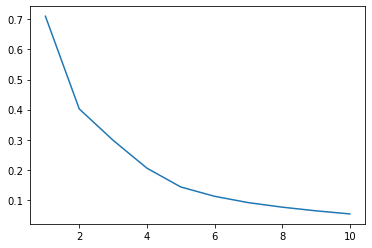

In [78]:
plt.plot(k,inertia)

In [79]:
# from the elbow method we can see that 5 clusters seem to be the appropriate
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df[["location.lat","location.lng"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
cluster = kmeans.labels_

In [81]:
map_clusters = folium.Map(location = [latitude,longitude],zoom_start = 12)

rainbow = ["red","blue","orange","yellow","purple"]

# add markers to the map
markers_colors = []
for lat, lon, name,cuisine, cluster in zip(df['location.lat'], df['location.lng'], df['name'],df['cuisine'], kmeans.labels_):
    label = folium.Popup(str(name)+ " " + str(cuisine), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [82]:
# red - cluster 0
# blue - cluster 1
# orange - cluster 2
# yellow - cluster 3
# purple - cluster 4

In [83]:
df["cluster"] = kmeans.labels_

In [84]:
df.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood,cuisine,rating,cluster
0,51e89088498e43610e52a231,The Farmers Union,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",v-1588669334,False,151 W Santa Clara St,37.335140,-121.893030,"[{'label': 'display', 'lat': 37.33513994153727...",246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American,NaN,4
1,4eb1e7027beb87f0c44e0c1b,Liquid Restaurant & Lounge,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",v-1588669334,False,32 S 3rd St,37.336702,-121.887864,"[{'label': 'display', 'lat': 37.33670185478302...",247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American,NaN,4
2,4dd0300e7d8b975f18f9f389,Denny's,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",v-1588669334,False,NaN,37.314346,-121.906177,"[{'label': 'display', 'lat': 37.31434620658678...",2796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American,NaN,4
3,4a26becaf964a520d07e1fe3,The Grill on the Alley,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",v-1588669334,False,"172 S Market St,",37.332610,-121.889127,"[{'label': 'display', 'lat': 37.33261, 'lng': ...",418,...,315737,https://www.grubhub.com/restaurant/the-grill-o...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,American,NaN,4
4,5adddea883e38027b3eafd08,Five Guys,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",v-1588669334,False,438 North Capitol Avenue,37.373646,-121.844089,"[{'label': 'display', 'lat': 37.37364598196921...",5857,...,2062306,https://www.grubhub.com/restaurant/five-guys-4...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,American,NaN,1


In [85]:
df["cluster"].value_counts()

4    129
2     65
3     53
0     45
1     39
Name: cluster, dtype: int64

In [69]:
kmeans.labels_

array([2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1,
       2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0,
       0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0,
       0, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1,

In [87]:
for i in range(5):
    print("Cluster ",i)
    print(df.loc[df["cluster"] == i]["cuisine"].value_counts())
    print("__________________________________________")

Cluster  0
American    10
Mexican      8
Japanese     7
Chinese      6
Thai         5
Indian       4
Italian      3
French       1
Spanish      1
Name: cuisine, dtype: int64
__________________________________________
Cluster  1
Mexican     13
Chinese     11
Thai         4
Italian      3
American     3
Indian       3
Japanese     2
Name: cuisine, dtype: int64
__________________________________________
Cluster  2
Indian      14
American    11
Thai        11
Japanese     8
Italian      7
Chinese      6
Mexican      4
Spanish      3
French       1
Name: cuisine, dtype: int64
__________________________________________
Cluster  3
Chinese     13
Japanese    11
Indian       9
Thai         7
Mexican      5
Italian      3
American     3
French       1
Spanish      1
Name: cuisine, dtype: int64
__________________________________________
Cluster  4
American    23
Japanese    21
Mexican     20
Italian     18
Indian      16
Chinese     13
Thai        12
French       3
Spanish      3
Name: cuisine, d

In [73]:
# we can see that cluster 0 (red) is closer to the city compared to the cluster 1 (blue)
# cluster 4 has the highest number of restaurants but it also has only a few spanish and french restaurant

In [74]:
# so opening a spanish restaurant in cluster 4 seems good

In [90]:
# cluster 4 center
lat,long = kmeans.cluster_centers_[4]

In [91]:
lat,long

(37.32683590424944, -121.89186990586737)

In [ ]:
# so a spanish or a french restaurant in the vicinity of coordinates (37.32683590424944, -121.89186990586737)
# would be highly profitable